## Meta SAM

https://github.com/facebookresearch/segment-anything

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

In [1]:
!ls

cell-boundary  detection-demo.ipynb  old-backup
dataset        images		     sam_vit_h_4b8939.pth


In [2]:
import cv2
import numpy as np
import os
import torch

import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
image = cv2.imread('dataset/images/R3C6__03_p1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)

### SAM prediction

``x = masks[i]['bbox'][0] + masks[i]['bbox'][2] / 2``

``y = masks[i]['bbox'][1] + masks[i]['bbox'][3] / 2``


### GT label

``x = mat_contents['Centers'][0][i]``

``y = mat_contents['Centers'][1][i]``

### display the original cell image

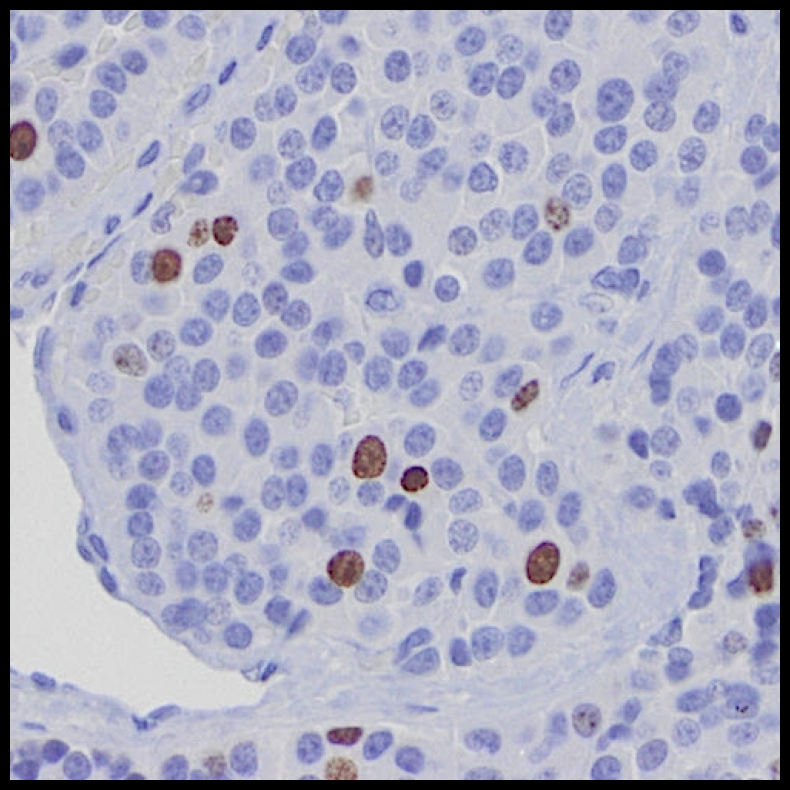

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

### visualize the segmentation mask with the cell center

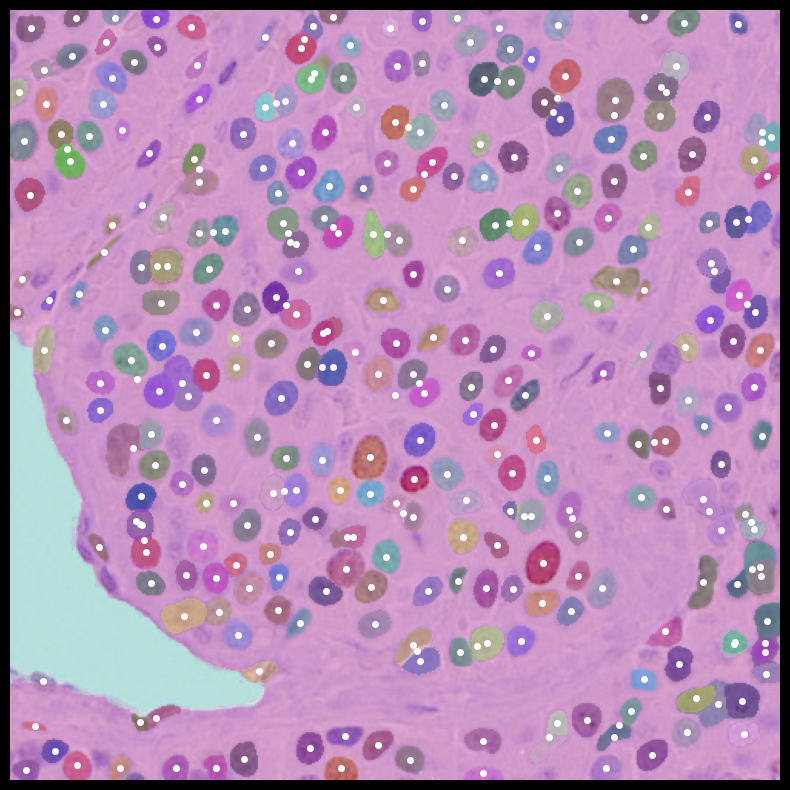

In [7]:
masks = mask_generator.generate(image)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)

for i, v in enumerate(masks):
    x = v['bbox'][0] + v['bbox'][2] / 2
    y = v['bbox'][1] + v['bbox'][3] / 2
    plt.plot(x, y, marker="o", markersize=4, markeredgecolor="white", markerfacecolor="white")

plt.axis('off')
plt.show()